In [1]:
### we will collect the stock data
### preprocess the data train and test
### create an stacked LSTM model
### predict the test data and plot the output
### predict the future 30 days and plot output

In [2]:
# !pip install pandas_datareader 

In [3]:
### Data Collection
import pandas_datareader as pdr
key="96a205333c24515d19ead3019339ab99d1af15b9"

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\vatsal shingala\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-05-17 00:00:00+00:00,186.99,188.91,186.36,188.00,17294029,44.671667,45.130352,44.521160,44.912954,69176116,0.0,1.0
1,AAPL,2018-05-18 00:00:00+00:00,186.31,187.81,186.13,187.19,18297728,44.509215,44.867563,44.466214,44.719446,73190912,0.0,1.0
2,AAPL,2018-05-21 00:00:00+00:00,187.63,189.27,186.91,188.00,18400787,44.824562,45.216356,44.652555,44.912954,73603148,0.0,1.0
3,AAPL,2018-05-22 00:00:00+00:00,187.16,188.88,186.78,188.38,15240704,44.712279,45.123185,44.621498,45.003736,60962816,0.0,1.0
4,AAPL,2018-05-23 00:00:00+00:00,188.36,188.50,185.76,186.35,20058415,44.998958,45.032404,44.377821,44.518771,80233660,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-05-09 00:00:00+00:00,171.770,173.54,171.60,173.05,45326874,171.531444,173.298986,171.361680,172.809667,45326874,0.00,1.0
1253,AAPL,2023-05-10 00:00:00+00:00,173.555,174.03,171.90,173.02,53724501,173.313965,173.788306,171.661264,172.779708,53724501,0.00,1.0
1254,AAPL,2023-05-11 00:00:00+00:00,173.750,174.59,172.17,173.85,49514676,173.508695,174.347528,171.930889,173.608556,49514676,0.00,1.0
1255,AAPL,2023-05-12 00:00:00+00:00,172.570,174.06,171.00,173.62,45533138,172.570000,174.060000,171.000000,173.620000,45533138,0.24,1.0
1256,AAPL,2023-05-15 00:00:00+00:00,172.070,173.21,171.47,173.16,37266659,172.070000,173.210000,171.470000,173.160000,37266659,0.00,1.0


In [12]:
df1=df.reset_index()['close']
df1.shape

(1257,)

In [13]:
df1

0       186.990
1       186.310
2       187.630
3       187.160
4       188.360
         ...   
1252    171.770
1253    173.555
1254    173.750
1255    172.570
1256    172.070
Name: close, Length: 1257, dtype: float64

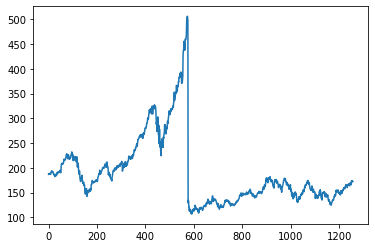

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.20075141]
 [0.19904822]
 [0.20235441]
 ...
 [0.16758923]
 [0.16463369]
 [0.16338134]]


In [19]:
### splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(817, 440)

In [21]:
train_data

array([[2.00751409e-01],
       [1.99048215e-01],
       [2.02354415e-01],
       [2.01177207e-01],
       [2.04182843e-01],
       [2.03656857e-01],
       [2.04733876e-01],
       [2.03030683e-01],
       [2.02028804e-01],
       [2.00450845e-01],
       [2.08891672e-01],
       [2.12874139e-01],
       [2.16581090e-01],
       [2.18259236e-01],
       [2.16956794e-01],
       [2.12548528e-01],
       [2.11371321e-01],
       [2.14001252e-01],
       [2.10043832e-01],
       [2.10294302e-01],
       [2.05385097e-01],
       [2.05134627e-01],
       [1.97495304e-01],
       [1.99524108e-01],
       [1.96919224e-01],
       [1.95566688e-01],
       [1.88678773e-01],
       [1.94339386e-01],
       [1.93663118e-01],
       [1.97019411e-01],
       [1.96042580e-01],
       [2.01227301e-01],
       [1.93061991e-01],
       [1.96768942e-01],
       [2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],


In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1): ##done 100% #assume then is 101 data in dataset then loop run for 1 times
        a = dataset[i:(i+time_step), 0]#            x train       y train
        dataX.append(a)               ### i=0,  0,1,2,3-----99     100 
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #time step= 100 means it takes previous 100 days data for prediction
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create the Stacked LSTM model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 280ms/step - loss: 0.0300 - val_loss: 6.0974e-04
Epoch 2/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0128 - val_loss: 7.3505e-04
Epoch 3/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0116 - val_loss: 0.0018
Epoch 4/100
12/12 [==============================] - 2s 159ms/step - loss: 0.0092 - val_loss: 4.0831e-04
Epoch 5/100
12/12 [==============================] - 2s 161ms/step - loss: 0.0079 - val_loss: 5.8332e-04
Epoch 6/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0068 - val_loss: 3.5286e-04
Epoch 7/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0065 - val_loss: 3.0259e-04
Epoch 8/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0080 - val_loss: 4.4976e-04
Epoch 9/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0079 - val_loss: 0.0026
Epoch 10/100
12/12 [==============================] - 2s 184ms/

In [33]:
import tensorflow as tf

# Lets Do the prediction and check performance metrics

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 24ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

227.44885434951223

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

155.34550528111149

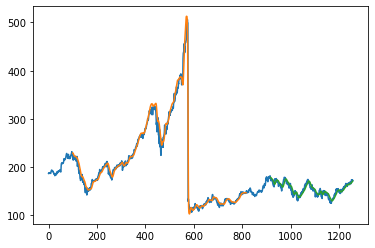

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [58]:
len(test_data)

440

In [65]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [66]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,
 0.06266750156543521,
 0.05808390732623664,
 0.04809016906700059,
 0.05703193487789604,
 0.05783343769567939,
 0.04566061365059482,
 0.04889167188478394,
 0.045535378835316165,
 0.05705698184095176,
 0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.0665497808390732,
 0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.1028929242329

In [47]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0                       ##done 100%
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16329052]
101
1 day input [0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415

8 day output [[0.16495334]]
9 day input [0.04889167 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016
 0.06654978 0.06993112 0.07288666 0.07105823 0.07120852 0.07772073
 0.08583594 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982
 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953
 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272
 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224
 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306

16 day output [[0.16614385]]
17 day input [0.07288666 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261
 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623
 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178
 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967
 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16329052
 0.1638764  0.164190

24 day output [[0.16753356]]
25 day input [0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16329052 0.1638764  0.1641904
 0.16436683 0.16448765 0.16459465 0.16470534 0.16482483 0.16495334
 0.16508907 0.1652303

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:

import matplotlib.pyplot as plt

In [50]:
len(df1)

1257

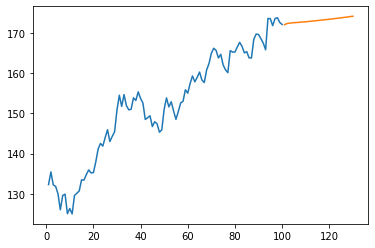

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

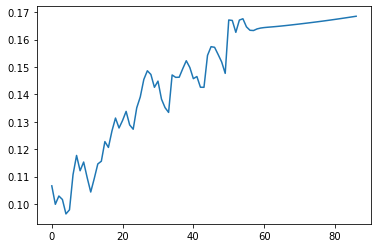

In [70]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [71]:
df3=scaler.inverse_transform(df3).tolist()

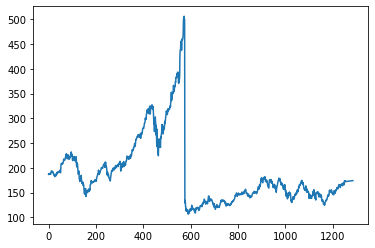

In [72]:
plt.plot(df3)